<a href="https://colab.research.google.com/github/fjadidi2001/AD_Prediction/blob/main/Detecting_dementia_from_speech_and_transcripts_using_transformers_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


---

# Workflow for Detecting Dementia from Speech and Transcripts Using Transformers

## 1. Data Preparation

* **Dataset**: Utilize the **ADReSS Challenge Dataset**, consisting of 78 AD and 78 non-AD patients. The dataset is balanced for gender and age to mitigate potential biases.

* **Speech Data**:
  Convert audio files into images with three channels:

  * Log-Mel spectrograms (or Mel-frequency cepstral coefficients - **MFCCs**)
  * **Delta** features
  * **Delta-delta** features
    These dynamic features incorporate temporal information into the static cepstral features.

* **Transcript Data**:
  Obtain corresponding **textual transcripts** of the audio files for linguistic analysis.

* **Data Splitting**:
  Divide the dataset as follows:

  * **Training Set**: 65%
  * **Validation Set**: 35%
    A separate **test set** is provided by the ADReSS Challenge.

---

## 2. Feature Extraction

### Acoustic Features

* Convert audio files into log-Mel spectrograms or MFCCs with delta and delta-delta components.
* Stack these into **three-channel image representations**.
* Feed the images into a **Vision Transformer (ViT)**.
  ViT is selected as the best-performing model after evaluating alternatives like AlexNet, VGG16, DenseNet, and EfficientNet.

### Textual Features

* Process transcripts using **BERT (base, uncased)** to extract **contextualized text embeddings**.

> **Rationale**:
>
> * Delta and delta-delta features enrich speech dynamics.
> * Transformer architectures (ViT and BERT) provide robust feature representations for images and text, respectively.

---

## 3. Model Architecture

### Unimodal Models

* **Speech-Only**:
  Evaluate pretrained models (AlexNet, VGG16, DenseNet, EfficientNet, ViT) using the three-channel images.
  **ViT** is the top performer.

* **Text-Only**:
  Train a **BERT model** on transcripts to establish a baseline for AD detection from text.

### Multimodal Models

* **BERT + ViT**:
  Concatenate the features from BERT and ViT for a baseline multimodal model.

* **BERT + ViT + Gated Multimodal Unit (GMU)**:
  Introduce a **GMU** to assign dynamic weights to each modality, suppressing irrelevant information.
  Inspired by gating mechanisms in GRU/LSTM.

* **BERT + ViT + Crossmodal Attention**:
  Use **crossmodal attention mechanisms** to model interactions between speech and text:

  * **Text-to-Image Attention**
  * **Image-to-Text Attention**

  Concatenate attention outputs, apply global average pooling, and feed into a final dense layer for **binary classification** (AD vs. non-AD).

> **Rationale**:
>
> * GMU enables adaptive modality fusion.
> * Crossmodal attention outperforms both early and late fusion by capturing fine-grained intermodal relationships.

---

## 4. Model Training

* **Environment**:
  Tesla P100-PCIE-16GB GPU, using **PyTorch**.

* **Optimization**:

  * **Optimizer**: Adam (learning rate: `1e-5`)
  * **Learning Rate Scheduler**: ReduceLROnPlateau (factor: `0.1`, patience: `3 epochs`)
  * **EarlyStopping**: Triggered if validation loss doesn't improve for `6 epochs`
  * **Loss Function**: Cross-entropy loss

* **Training Protocol**:

  * Each model is trained **five times**.
  * Average the results to reduce variability.
  * Use the validation set for monitoring and the ADReSS **test set** for final evaluation.

---

## 5. Evaluation

* **Metrics**:

  * Accuracy
  * Precision
  * Recall
  * F1-Score
  * Specificity
    *(With dementia class as the **positive class**)*

* **Comparison**:

  * **Unimodal**: Compare ViT and BERT with other SOTA approaches.
  * **Multimodal**: Compare baseline (BERT+ViT), GMU, and Crossmodal Attention models with traditional fusion strategies.

### Key Findings

* **ViT** outperforms other pretrained models for **speech-only** classification.
* **BERT + ViT + Crossmodal Attention** achieves the **highest performance**:

  * **Accuracy**:

    * 88.33% with log-Mel spectrograms
    * 87.92% with MFCCs
  * **F1-Score**:

    * 88.69% with log-Mel spectrograms
    * 87.99% with MFCCs
* Crossmodal attention exceeds GMU and concatenation by:

  * **Accuracy** improvement: +3.13% to +15.41%
  * **F1-Score** improvement: +3.29% to +18.93%

---

## 6. Analysis and Discussion

### Limitations

* The ADReSS dataset is **relatively small** (156 samples).
* **Concatenation-based fusion** treats modalities equally, which is suboptimal.
* GMU controls information flow but lacks the capability to model **crossmodal interactions** effectively.

### Advantages

* **ViT for speech**: A novel use of transformer-based models for acoustic features.
* **Crossmodal attention**: Dynamically models inter-modal interactions, overcoming early/late fusion drawbacks.

### Future Work

* Explore **optimal transport** methods for modality fusion.
* Investigate **wav2vec 2.0** for creating speech image representations.
* Expand dataset size for greater **model robustness**.

---

## 7. Conclusion

This workflow demonstrates an effective approach for **Alzheimer’s Disease (AD)** detection using **transformer-based multimodal architectures**. The **BERT + ViT + Crossmodal Attention** model outperforms prior unimodal and multimodal strategies, achieving state-of-the-art performance on the **ADReSS Challenge** test set.

> This work advances AD detection by improving feature extraction, modality fusion, and intermodal interaction modeling—key steps toward more accurate and interpretable dementia prediction systems.

---



Mounted at /content/drive
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 113.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 94.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 105.8 MB/s eta 0:00:00
Installed Library Versions:


,Library,Version
0,librosa,0.11.0
1,soundfile,0.13.1
2,transformers,4.51.3
3,torch,2.6.0+cu124
4,pandas,2.2.2
5,matplotlib,3.10.0
6,seaborn,0.13.2


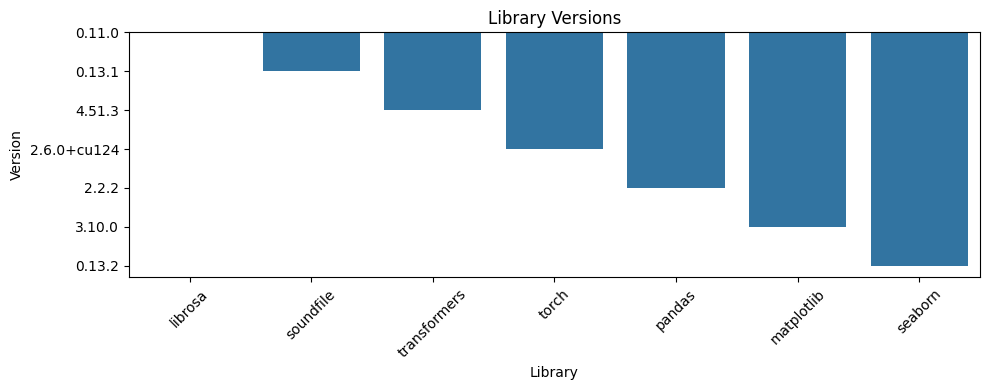

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Install required libraries
!pip install -q librosa soundfile transformers torch torchaudio pandas matplotlib seaborn tqdm

# Import libraries
import os
import glob
import tarfile
import pandas as pd
import numpy as np
import librosa
import soundfile as sf
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

# Set paths
data_path = '/content/drive/MyDrive/Voice/'  # Adjust to your Google Drive path
extracted_path = '/content/extracted_audio/'
os.makedirs(extracted_path, exist_ok=True)

# Visualize: Library versions
import pkg_resources
libraries = ['librosa', 'soundfile', 'transformers', 'torch', 'pandas', 'matplotlib', 'seaborn']
versions = {lib: pkg_resources.get_distribution(lib).version for lib in libraries}
versions_df = pd.DataFrame(list(versions.items()), columns=['Library', 'Version'])
print("Installed Library Versions:")
display(versions_df)

# Plot library versions
plt.figure(figsize=(10, 4))
sns.barplot(x='Library', y='Version', data=versions_df)
plt.title('Library Versions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Successfully extracted /content/drive/MyDrive/Voice/ADReSSo21-progression-train.tgz
Successfully extracted /content/drive/MyDrive/Voice/ADReSSo21-progression-test.tgz
Successfully extracted /content/drive/MyDrive/Voice/ADReSSo21-diagnosis-train.tgz
Extraction Status:


,File,Status
0,train_prog,Success
1,test_prog,Success
2,train_diag,Success


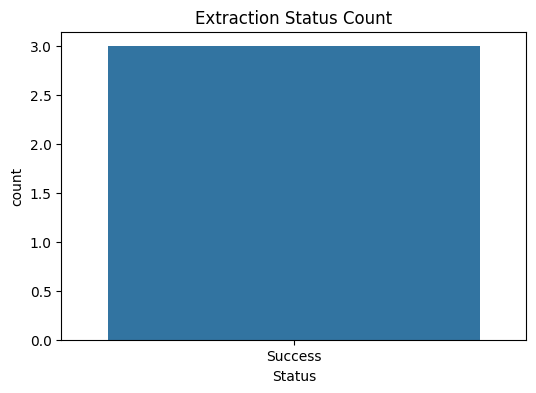

Extracted directories (525): ['/content/extracted_audio/', '/content/extracted_audio/ADReSSo21', '/content/extracted_audio/ADReSSo21/progression', '/content/extracted_audio/ADReSSo21/progression/train', '/content/extracted_audio/ADReSSo21/progression/train/segmentation']


In [2]:
# Define .tgz file paths
tgz_files = {
    'train_prog': os.path.join(data_path, 'ADReSSo21-progression-train.tgz'),
    'test_prog': os.path.join(data_path, 'ADReSSo21-progression-test.tgz'),
    'train_diag': os.path.join(data_path, 'ADReSSo21-diagnosis-train.tgz')
}

# Extract .tgz files
def extract_tgz(tgz_path, extract_to):
    try:
        with tarfile.open(tgz_path, 'r:gz') as tar:
            tar.extractall(path=extract_to)
        print(f"Successfully extracted {tgz_path}")
        return True
    except Exception as e:
        print(f"Error extracting {tgz_path}: {str(e)}")
        return False

# Extract all .tgz files and track status
extraction_status = []
for name, tgz in tgz_files.items():
    status = extract_tgz(tgz, extracted_path)
    extraction_status.append({'File': name, 'Status': 'Success' if status else 'Failed'})

# Visualize: Extraction status
status_df = pd.DataFrame(extraction_status)
print("Extraction Status:")
display(status_df)

plt.figure(figsize=(6, 4))
sns.countplot(data=status_df, x='Status')
plt.title('Extraction Status Count')
plt.show()

# List extracted directories
extracted_dirs = glob.glob(os.path.join(extracted_path, '**'), recursive=True)
print(f"Extracted directories ({len(extracted_dirs)}):", extracted_dirs[:5])

In [3]:
# Find all WAV files
audio_files = glob.glob(os.path.join(extracted_path, '**/*.wav'), recursive=True)
print(f"Found {len(audio_files)} audio files.")

# Load metadata (assuming one CSV contains relevant labels)
metadata_path = glob.glob(os.path.join(extracted_path, '**/*.csv'), recursive=True)
if metadata_path:
    metadata = pd.read_csv(metadata_path[0])
    metadata['dx'] = metadata['dx'].astype(str)
    print("Metadata loaded:")
    display(metadata.head())
else:
    raise FileNotFoundError("No metadata CSV found.")

# Match audio files with metadata
audio_metadata = []
for audio_file in audio_files:
    fname = os.path.basename(audio_file).replace('.wav', '')
    matching_row = metadata[metadata['adressfname'] == fname]
    if not matching_row.empty:
        audio_metadata.append({
            'file': audio_file,
            'label': matching_row['dx'].iloc[0],
            'mmse': matching_row['mmse'].iloc[0]
        })
audio_metadata = pd.DataFrame(audio_metadata)
print(f"Matched {len(audio_metadata)} audio files with metadata.")

# Check unmatched files
audio_fnames = [os.path.basename(f).replace('.wav', '') for f in audio_files]
unmatched = [f for f in audio_fnames if f not in metadata['adressfname'].values]
print(f"Unmatched files ({len(unmatched)}):", unmatched[:10])

# Visualize: Label distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=audio_metadata, x='label')
plt.title('Label Distribution in Matched Metadata')
plt.savefig('/content/label_distribution.png')
plt.show()

# Visualize: MMSE score distribution
plt.figure(figsize=(8, 6))
sns.histplot(data=audio_metadata, x='mmse', hue='label', multiple='stack')
plt.title('MMSE Score Distribution by Label')
plt.savefig('/content/mmse_distribution.png')
plt.show()

# Table: Summary statistics
print("Metadata Summary:")
display(audio_metadata.describe(include='all'))

Found 271 audio files.


KeyError: 'dx'